<a href="https://colab.research.google.com/github/ZhyShe/Summer_2019/blob/master/src/LIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\tau_m\frac{du}{dt}=-[u(t)-u_{rest}]+RI(t)
$$

In [0]:
! pip3 install brian2

In [0]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def LIF_synapse(n,
                input_current,
               simulation_time,
               v_rest,
               v_reset,
               firing_threshold,
                membrane_resistance,
                membrane_time_scale
               ):
  '''
  Args:
       n: int, number of neuron
       input_current: a list, shape, 1*n
       simulation_time: Time for which the dynamics are simulated
       v_rest: Resting potential
       v_reset: Reset voltage after spike 
       firing_threshold: Voltage threshold for spiking
       
  '''
  eqs='''
  dv/dt = (-(v-v_rest) + membrane_resistance * I) / membrane_time_scale : volt
  I : amp
  '''
  G=b2.NeuronGroup(2, eqs, threshold='v>firing_threshold', reset='v=v_reset', method='linear')
  G.v=[v_rest,v_rest]
  G.I=input_current
  S = b2.Synapses(G, G, on_pre='v_post += 1*mV')
  S.connect(i=0, j=1)
  M1 = b2.SpikeMonitor(G)
  b2.run(simulation_time)
  x,y=M1.count/simulation_time
  return x,y
  

In [0]:
v_rest = -70*b2.mV
v_reset = -65*b2.mV
firing_threshold = -50*b2.mV
membrane_resistance = 10.* b2.Mohm
membrane_time_scale = 10*b2.ms
input_current=[1,0]*b2.amp
simulation_time=500*b2.ms
n=2

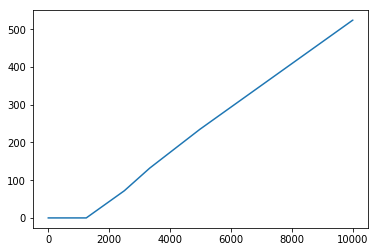

In [0]:
inputs=np.linspace(1,2000,100)
xs=[]
ys=[]
for Input in inputs:
  x,y=LIF_synapse(n,
                [Input,0]*b2.namp,
               simulation_time,
               v_rest,
               v_reset,
               firing_threshold,
                membrane_resistance,
                membrane_time_scale
               )
  xs.append(x)
  ys.append(y)
plt.plot(xs,ys)
plt.show()